In [1]:
import re
# import spacy
import numpy as np
import pandas as pd
import seaborn as sns
# from textblob import TextBlob
# from bertopic import BERTopic
import matplotlib.pyplot as plt
# from transformers import pipeline

In [2]:
all_tweets_to_analyze_with_fx = pd.read_csv('all_tweets_to_analyze_with_fx_20250528_2331.csv')

In [3]:
all_tweets_to_analyze_with_fx.columns

Index(['politician', 'date', 'tweet_text', 'sentiment_score',
       'subjectivity_score', 'fear_score', 'economic_term_count',
       'policy_term_count', 'currency_mention', 'economic_term_ratio',
       'named_entities', 'topic_id', 'sentiment_volatility_7d',
       'usd_try_ratio', 'usd_try_2h_later_ratio', 'usd_try_4h_later_ratio',
       'euro_usd_ratio', 'euro_usd_2h_later_ratio', 'euro_usd_4h_later_ratio',
       'xau_usd_ratio', 'xau_usd_2h_later_ratio', 'xau_usd_4h_later_ratio',
       'sp500_ratio', 'sp500_2h_later_ratio', 'sp500_4h_later_ratio'],
      dtype='object')

In [4]:
all_tweets_to_analyze_with_fx["usd_try_2h_difference"] = (all_tweets_to_analyze_with_fx["usd_try_2h_later_ratio"]
                                                          - all_tweets_to_analyze_with_fx["usd_try_ratio"])
all_tweets_to_analyze_with_fx["usd_try_4h_difference"] = (all_tweets_to_analyze_with_fx["usd_try_4h_later_ratio"]
                                                          - all_tweets_to_analyze_with_fx["usd_try_ratio"])

all_tweets_to_analyze_with_fx["euro_usd_2h_difference"] = (all_tweets_to_analyze_with_fx["euro_usd_2h_later_ratio"]
                                                          - all_tweets_to_analyze_with_fx["euro_usd_ratio"])
all_tweets_to_analyze_with_fx["euro_usd_4h_difference"] = (all_tweets_to_analyze_with_fx["euro_usd_4h_later_ratio"]
                                                          - all_tweets_to_analyze_with_fx["euro_usd_ratio"])

all_tweets_to_analyze_with_fx["xau_usd_2h_difference"] = (all_tweets_to_analyze_with_fx["xau_usd_2h_later_ratio"]
                                                          - all_tweets_to_analyze_with_fx["xau_usd_ratio"])
all_tweets_to_analyze_with_fx["xau_usd_4h_difference"] = (all_tweets_to_analyze_with_fx["xau_usd_4h_later_ratio"]
                                                          - all_tweets_to_analyze_with_fx["xau_usd_ratio"])

all_tweets_to_analyze_with_fx["sp500_2h_difference"] = (all_tweets_to_analyze_with_fx["sp500_2h_later_ratio"]
                                                          - all_tweets_to_analyze_with_fx["sp500_ratio"])
all_tweets_to_analyze_with_fx["sp500_4h_difference"] = (all_tweets_to_analyze_with_fx["sp500_4h_later_ratio"]
                                                          - all_tweets_to_analyze_with_fx["sp500_ratio"])

In [5]:
all_tweets_to_analyze_with_fx.columns

Index(['politician', 'date', 'tweet_text', 'sentiment_score',
       'subjectivity_score', 'fear_score', 'economic_term_count',
       'policy_term_count', 'currency_mention', 'economic_term_ratio',
       'named_entities', 'topic_id', 'sentiment_volatility_7d',
       'usd_try_ratio', 'usd_try_2h_later_ratio', 'usd_try_4h_later_ratio',
       'euro_usd_ratio', 'euro_usd_2h_later_ratio', 'euro_usd_4h_later_ratio',
       'xau_usd_ratio', 'xau_usd_2h_later_ratio', 'xau_usd_4h_later_ratio',
       'sp500_ratio', 'sp500_2h_later_ratio', 'sp500_4h_later_ratio',
       'usd_try_2h_difference', 'usd_try_4h_difference',
       'euro_usd_2h_difference', 'euro_usd_4h_difference',
       'xau_usd_2h_difference', 'xau_usd_4h_difference', 'sp500_2h_difference',
       'sp500_4h_difference'],
      dtype='object')

In [6]:
all_tweets_to_analyze_with_fx.head()

,politician,date,tweet_text,sentiment_score,subjectivity_score,fear_score,economic_term_count,policy_term_count,currency_mention,economic_term_ratio,...,sp500_2h_later_ratio,sp500_4h_later_ratio,usd_try_2h_difference,usd_try_4h_difference,euro_usd_2h_difference,euro_usd_4h_difference,xau_usd_2h_difference,xau_usd_4h_difference,sp500_2h_difference,sp500_4h_difference
0,Trump,2019-01-01 00:40:26,MEXICO IS PAYING FOR THE WALL through the many...,0.693526,0.555303,0.0,2,0,0,0.039216,...,2485.76,2485.76,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Trump,2019-01-01 00:51:43,"The Democrats will probably submit a Bill, bei...",-0.889143,1.000000,0.0,0,0,0,0.000000,...,2485.76,2485.76,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Trump,2019-01-01 01:05:39,...Remember this. Throughout the ages some thi...,-0.970347,0.433333,0.0,0,0,0,0.000000,...,2485.76,2485.76,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Trump,2019-01-01 12:51:34,"Dr. Sebastian Gorka, a very good and talented ...",0.992894,0.676909,0.0,0,0,0,0.000000,...,2485.76,2485.76,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Trump,2019-01-01 13:08:29,"HAPPY NEW YEAR TO EVERYONE, INCLUDING THE HATE...",0.967558,0.705429,0.0,0,0,0,0.000000,...,2485.76,2485.76,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


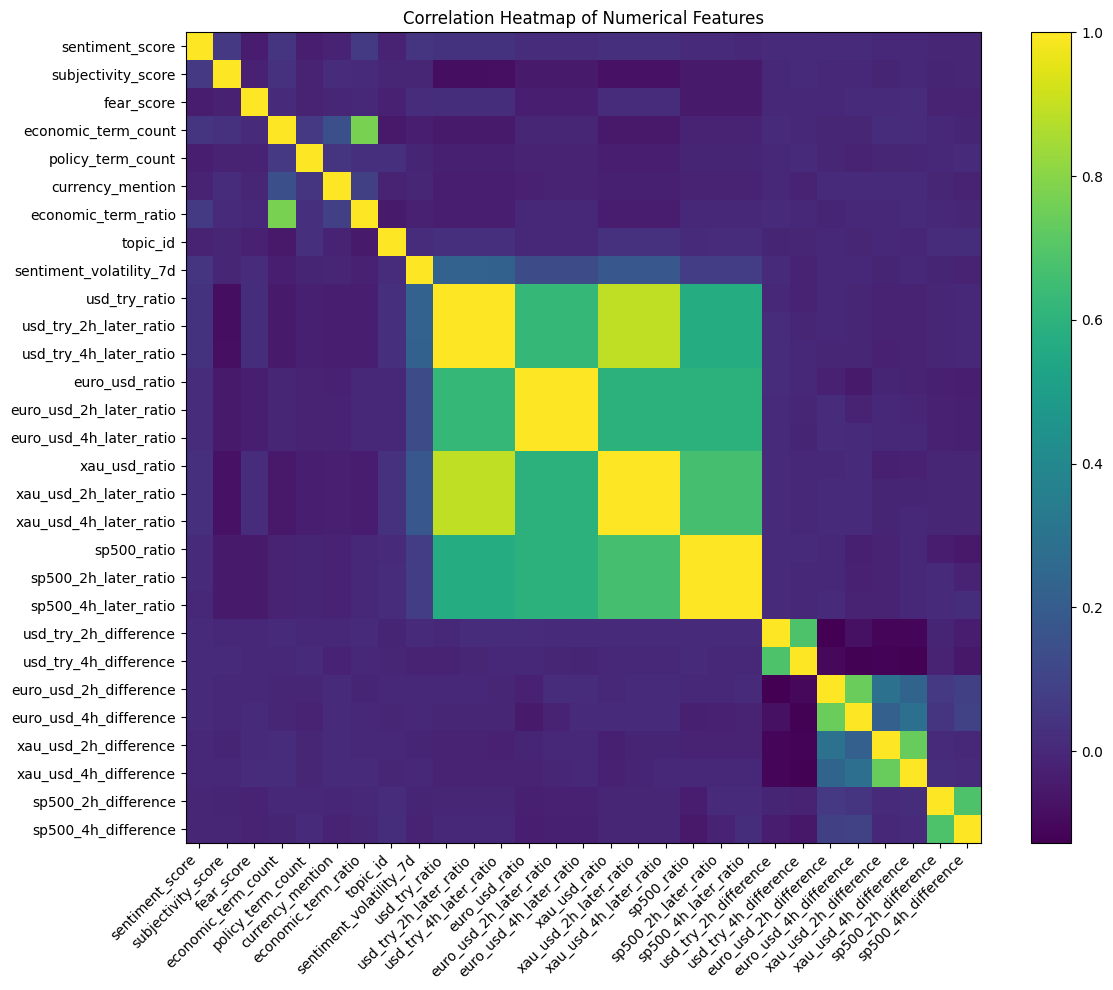

In [7]:
# Assume 'all_tweets_to_analyze_with_fx' is already available in the environment
df = all_tweets_to_analyze_with_fx.copy()

# Ensure 'date' is datetime
df['date'] = pd.to_datetime(df['date'])

# Select numeric columns for correlation
numeric_cols = df.select_dtypes(include=[np.number])
corr = numeric_cols.corr()

# Plot the heatmap using matplotlib
plt.figure(figsize=(12, 10))
plt.imshow(corr.values, aspect='auto')
plt.colorbar()
plt.xticks(np.arange(len(corr.columns)), corr.columns, rotation=45, ha='right')
plt.yticks(np.arange(len(corr.index)), corr.index)
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()


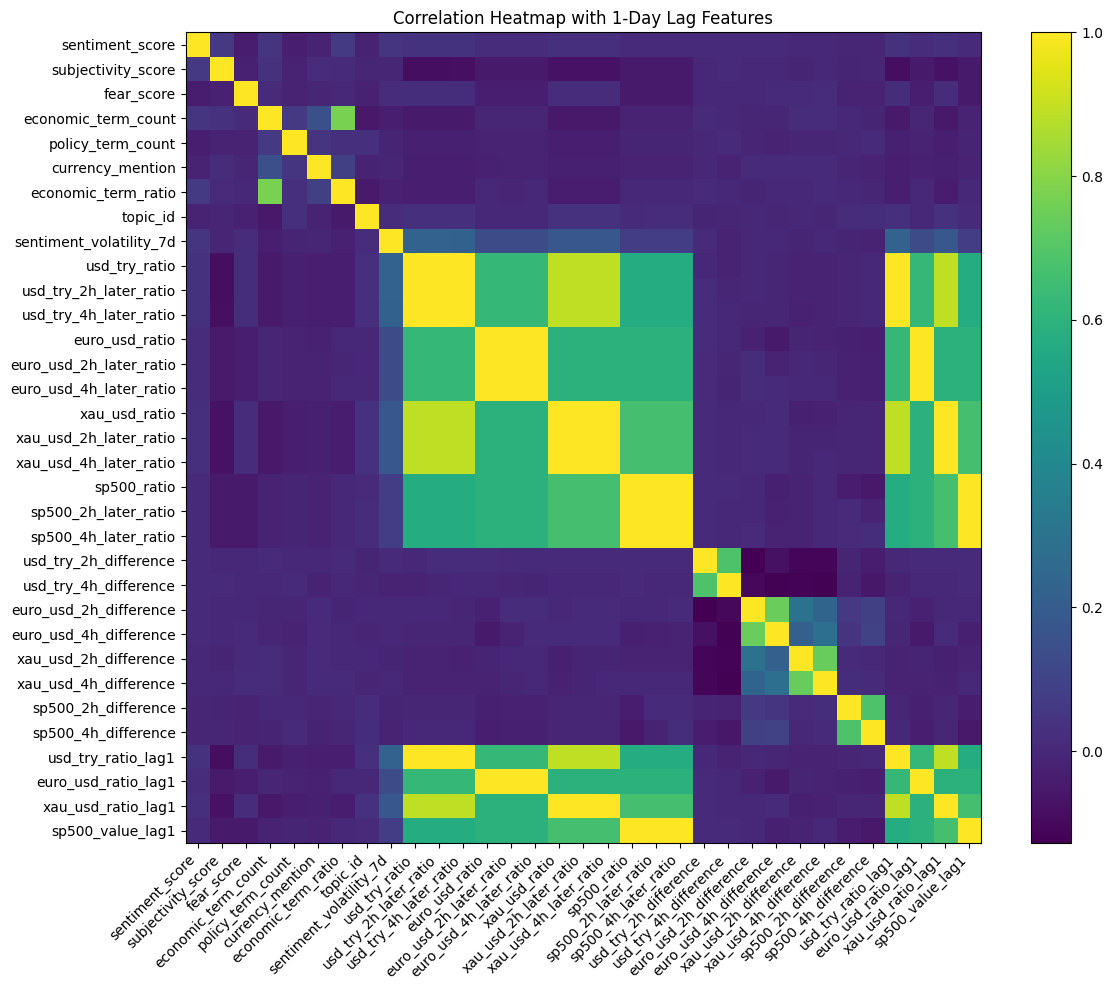

In [9]:
# Copy and prepare DataFrame
df = all_tweets_to_analyze_with_fx.copy()
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date')

# Create 1-day lag columns for market variables
df['usd_try_ratio_lag1']   = df['usd_try_ratio'].shift(1)
df['euro_usd_ratio_lag1']  = df['euro_usd_ratio'].shift(1)
df['xau_usd_ratio_lag1']   = df['xau_usd_ratio'].shift(1)
df['sp500_value_lag1']     = df['sp500_ratio'].shift(1)

# Drop the first row (which will have NaNs in the lag columns)
df = df.iloc[1:]

# Compute correlations including lagged features
numeric = df.select_dtypes(include=[np.number])
corr = numeric.corr()

# Plot updated heatmap
plt.figure(figsize=(12, 10))
plt.imshow(corr.values, aspect='auto')
plt.colorbar()
plt.xticks(np.arange(len(corr.columns)), corr.columns, rotation=45, ha='right')
plt.yticks(np.arange(len(corr.index)), corr.index)
plt.title('Correlation Heatmap with 1-Day Lag Features')
plt.tight_layout()
plt.show()

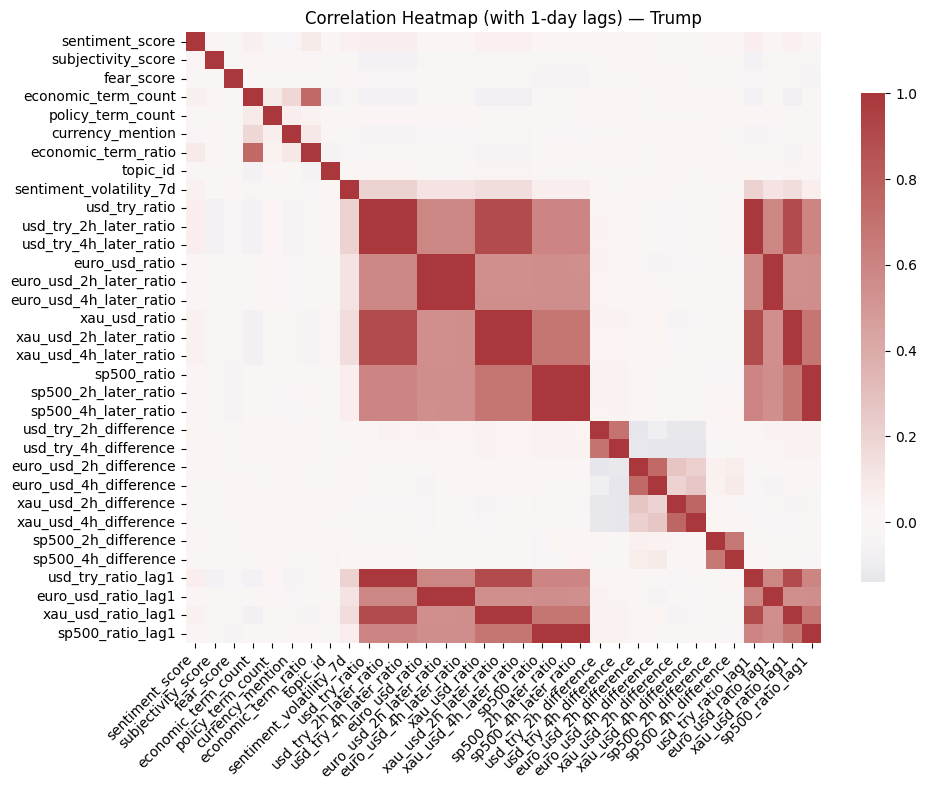

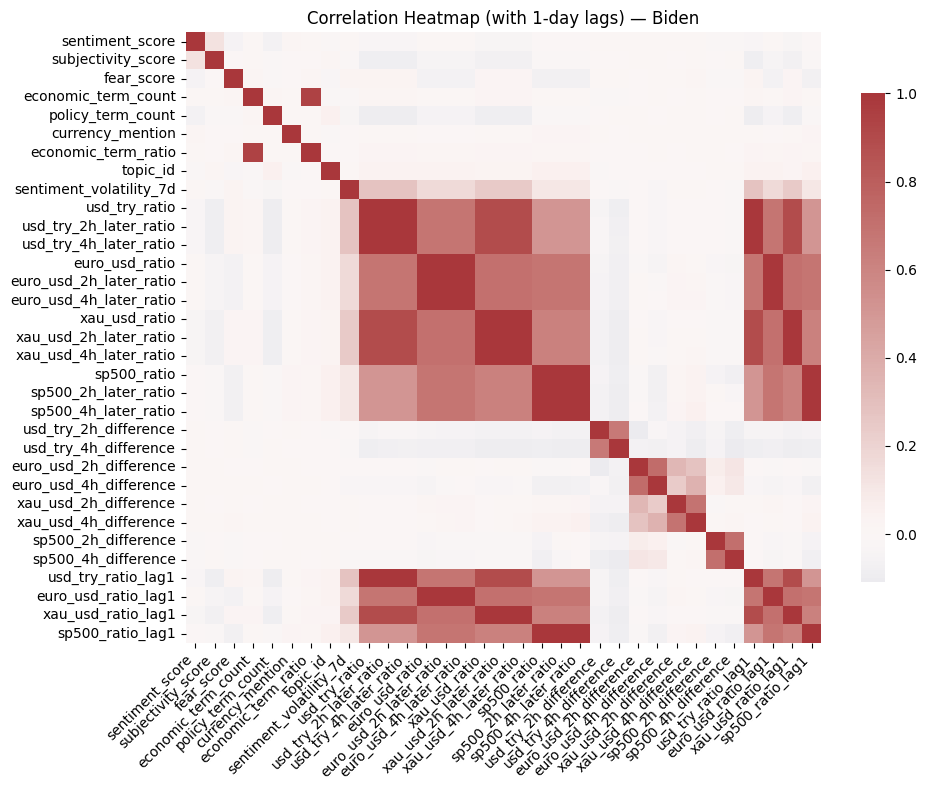

In [10]:
# 1) Prepare your DataFrame
df = all_tweets_to_analyze_with_fx.copy()
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date')

# Create 1-day lag columns
for col in ['usd_try_ratio','euro_usd_ratio','xau_usd_ratio','sp500_ratio']:
    df[f'{col}_lag1'] = df[col].shift(1)
df = df.dropna(subset=[f'{c}_lag1' for c in ['usd_try_ratio','euro_usd_ratio','xau_usd_ratio','sp500_ratio']])

# 2) Loop over each politician
for pol in df['politician'].unique():
    sub = df[df['politician']==pol]
    
    # select only numeric columns
    num = sub.select_dtypes(include=[np.number])
    
    # compute correlation matrix
    corr = num.corr()
    
    # 3) Plot
    plt.figure(figsize=(10,8))
    sns.heatmap(
        corr,
        cmap='vlag',
        center=0,
        annot=False,      # set True if you want the r-values annotated
        cbar_kws={'shrink':.8}
    )
    plt.title(f'Correlation Heatmap (with 1-day lags) — {pol}')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()


In [14]:
all_tweets_to_analyze_with_fx[all_tweets_to_analyze_with_fx['fear_score']!=0]

,politician,date,tweet_text,sentiment_score,subjectivity_score,fear_score,economic_term_count,policy_term_count,currency_mention,economic_term_ratio,...,sp500_2h_later_ratio,sp500_4h_later_ratio,usd_try_2h_difference,usd_try_4h_difference,euro_usd_2h_difference,euro_usd_4h_difference,xau_usd_2h_difference,xau_usd_4h_difference,sp500_2h_difference,sp500_4h_difference
58,Trump,2019-01-07 18:44:41,I am pleased to inform you that I will Address...,0.891018,0.500000,0.034483,0,0,0,0.00000,...,2554.11,2549.69,-0.00711,-0.00746,0.00110,0.00057,0.166,0.809,-5.70,-10.12
87,Trump,2019-01-11 16:04:25,Humanitarian Crisis at our Southern Border. I ...,-0.982358,0.536458,0.020408,0,0,0,0.00000,...,2586.65,2587.96,-0.00360,-0.01490,0.00046,-0.00128,-0.102,-2.262,7.73,9.04
100,Trump,2019-01-12 14:28:14,Democrats should come back to Washington and w...,-0.594547,0.225000,0.028571,0,0,0,0.00000,...,2581.36,2581.36,0.00000,0.00000,0.00000,0.00000,0.000,0.000,0.00,0.00
105,Trump,2019-01-12 16:14:55,We have a massive Humanitarian Crisis at our S...,-0.763986,0.271429,0.025000,0,0,0,0.00000,...,2581.36,2581.36,0.00000,0.00000,0.00000,0.00000,0.000,0.000,0.00,0.00
119,Trump,2019-01-14 03:12:34,The Trump portrait of an unsustainable Border ...,-0.974669,0.403333,0.023256,0,0,0,0.00000,...,2581.36,2581.36,0.00743,0.03476,0.00099,0.00106,0.829,2.186,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12997,Biden,2020-10-11 00:00:00,One in five small businesses have closed.\nMor...,-0.977366,0.600000,0.023810,0,0,0,0.00000,...,3511.35,3511.35,0.00000,0.00000,0.00000,0.00000,0.000,0.000,0.00,0.00
13532,Trump,2020-10-24 14:55:57,"The Fake News is talking about CASES, CASES, C...",-0.821933,0.488889,0.019608,0,0,0,0.00000,...,3424.65,3424.65,0.00000,0.00000,0.00000,0.00000,0.000,0.000,0.00,0.00
13722,Biden,2020-10-28 20:47:00,"Melanie, thank you for sharing your story and ...",0.936951,0.500000,0.022727,0,0,0,0.00000,...,3298.18,3298.18,0.00970,0.02866,0.00026,0.00054,0.652,1.152,0.76,0.76
13854,Biden,2020-10-31 01:55:00,From the climate crisis to student debt and gu...,0.826549,0.445000,0.024390,1,0,0,0.02439,...,3323.90,3323.90,0.00000,0.00000,0.00000,0.00000,0.000,0.000,0.00,0.00


C:\Users\gokse\AppData\Local\Temp\ipykernel_25740\284046442.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])


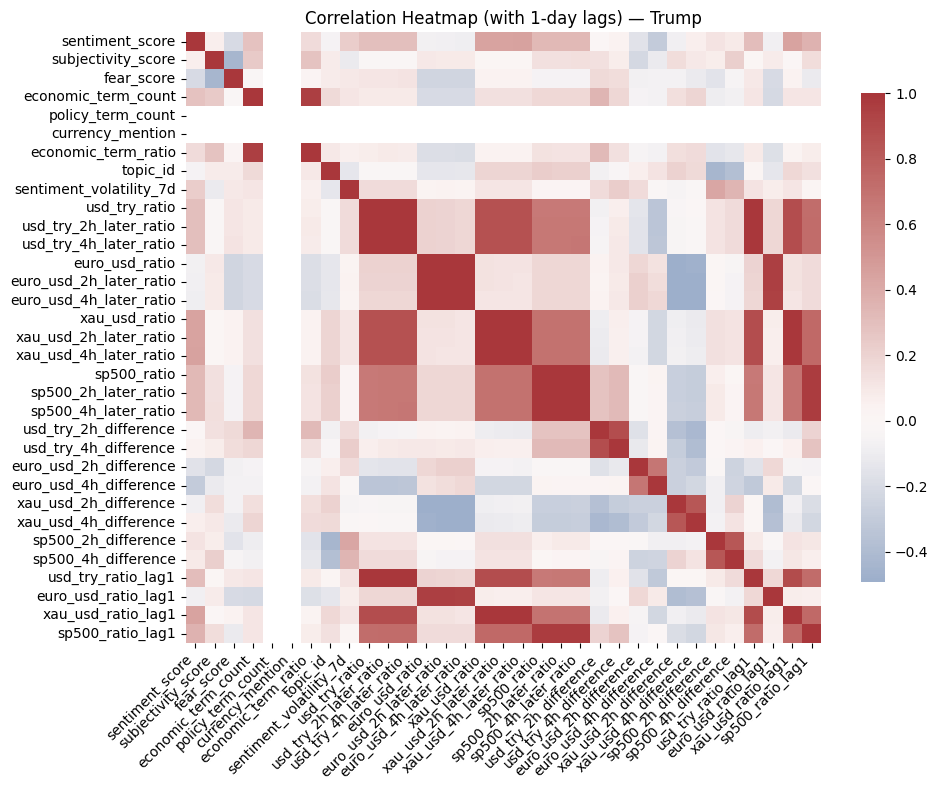

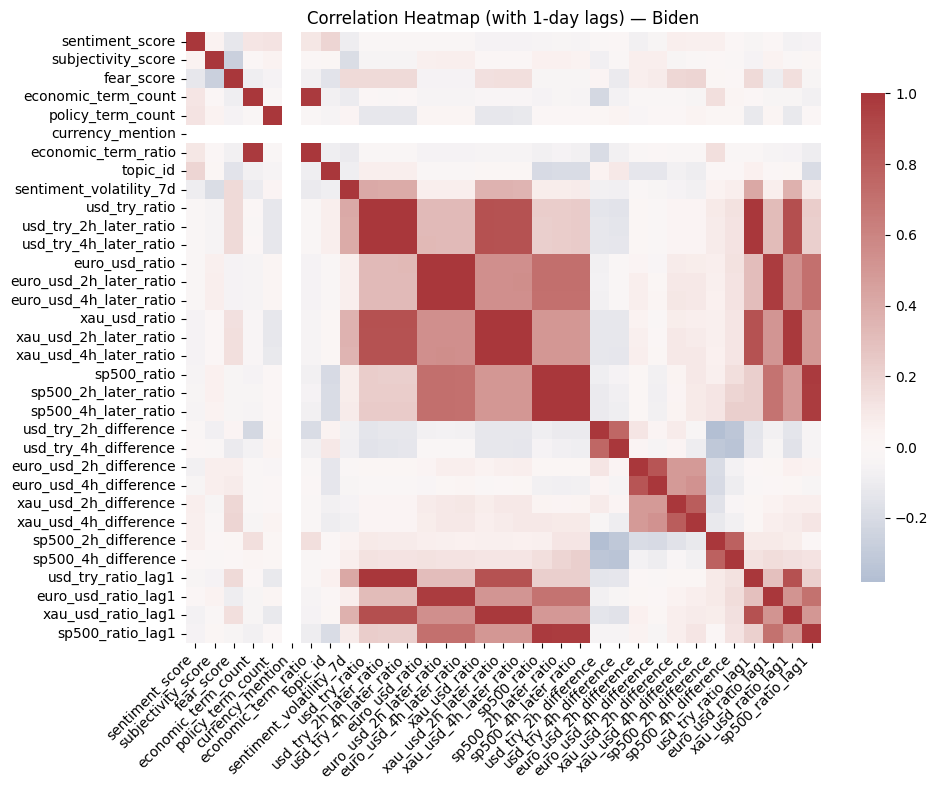

In [15]:
# 1) Prepare your DataFrame with fear scores
df = all_tweets_to_analyze_with_fx[all_tweets_to_analyze_with_fx['fear_score']!=0]
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date')

# Create 1-day lag columns
for col in ['usd_try_ratio','euro_usd_ratio','xau_usd_ratio','sp500_ratio']:
    df[f'{col}_lag1'] = df[col].shift(1)
df = df.dropna(subset=[f'{c}_lag1' for c in ['usd_try_ratio','euro_usd_ratio','xau_usd_ratio','sp500_ratio']])

# 2) Loop over each politician
for pol in df['politician'].unique():
    sub = df[df['politician']==pol]
    
    # select only numeric columns
    num = sub.select_dtypes(include=[np.number])
    
    # compute correlation matrix
    corr = num.corr()
    
    # 3) Plot
    plt.figure(figsize=(10,8))
    sns.heatmap(
        corr,
        cmap='vlag',
        center=0,
        annot=False,      # set True if you want the r-values annotated
        cbar_kws={'shrink':.8}
    )
    plt.title(f'Correlation Heatmap (with 1-day lags) — {pol}')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()


In [17]:
df.shape

(184, 37)

In [31]:
# Define the allowed features for 'Feature 1'
# allowed_features = [
#     'sentiment_score', 'subjectivity_score', 'fear_score', 'economic_term_count',
#     'policy_term_count', 'currency_mention', 'economic_term_ratio',
#     'named_entities', 'topic_id', 'sentiment_volatility_7d'
# ]
allowed_features = [
    'sentiment_score', 'subjectivity_score', 'fear_score', 'economic_term_count',
    'policy_term_count', 'currency_mention', 'economic_term_ratio', 'sentiment_volatility_7d'
]

# Compute correlation matrix for numeric columns in df
corr = df.select_dtypes(include=[np.number]).corr()

# Filter for correlations above 0.3 (excluding self-correlation and nulls)
correlated_pairs = (
    corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))  # upper triangle, exclude diagonal
    .stack()
    .reset_index()
)
correlated_pairs.columns = ['Feature 1', 'Feature 2', 'Correlation']

# Filter for allowed 'Feature 1' and abs(correlation) > 0.3
result = correlated_pairs[
    (correlated_pairs['Feature 1'].isin(allowed_features)) &
    (correlated_pairs['Correlation'].abs() > 0.1)
]
# Show the result sorted by absolute correlation (highest to lowest)
result.sort_values(by='Correlation', key=np.abs, ascending=False)

,Feature 1,Feature 2,Correlation
91,economic_term_count,economic_term_ratio,0.975149
198,sentiment_volatility_7d,usd_try_4h_later_ratio,0.318760
197,sentiment_volatility_7d,usd_try_2h_later_ratio,0.318539
196,sentiment_volatility_7d,usd_try_ratio,0.318052
216,sentiment_volatility_7d,usd_try_ratio_lag1,0.316366
31,subjectivity_score,fear_score,-0.304408
218,sentiment_volatility_7d,xau_usd_ratio_lag1,0.271594
202,sentiment_volatility_7d,xau_usd_ratio,0.261541
203,sentiment_volatility_7d,xau_usd_2h_later_ratio,0.260209
204,sentiment_volatility_7d,xau_usd_4h_later_ratio,0.259531


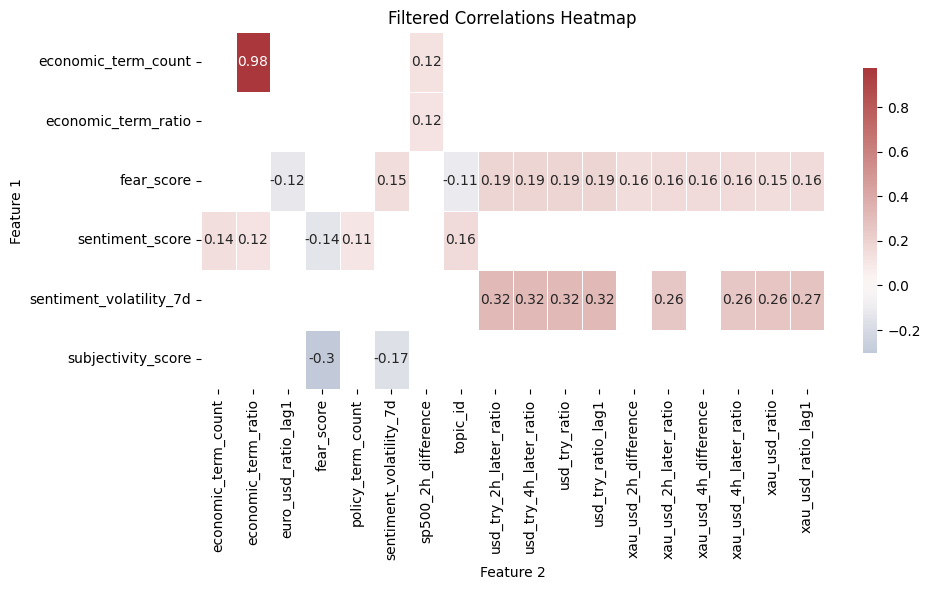

In [30]:
# Pivot the result DataFrame to create a matrix for heatmap
heatmap_data = result.pivot(index='Feature 1', columns='Feature 2', values='Correlation')

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='vlag', center=0, linewidths=0.5, cbar_kws={'shrink': .8})
plt.title('Filtered Correlations Heatmap')
plt.tight_layout()
plt.show()


Sentimen volatility USDTRY etkisi, XAUUSD etkisinden çok daha yüksek, bu da TRY para biriminin ne kadar etkilenmeye açık olduğunu gösteriyor.
 
Fear_score'da da hakeza aynı şekilde USDTRY'nin corealasyonu XAUUSD'den yüksek
 
S&P 500 Tweetlerdeki  Duygu analizinden etkilenmiyor
 
EUR/USD ise negatif etkileniyor

Understanding Sentiment Volatility
Sentiment volatility measures how dramatically and unpredictably sentiment scores fluctuate over time. It quantifies the instability in expressed sentiment - think of it as the "emotional mood swings" in a politician's communication pattern.

Key Characteristics:
Mathematical Definition
Calculated as the rolling standard deviation of sentiment scores over a defined period (e.g., 7 days). Higher standard deviation = higher volatility.

Visual Analogy
Compare these sentiment trends:

Low Volatility (Stable):  [0.2, 0.3, 0.1, 0.4] → std = 0.12
High Volatility (Erratic): [0.8, -0.7, 0.9, -0.6] → std = 0.82
Financial Interpretation
In your currency project, high sentiment volatility may signal:

Policy uncertainty

Reactive decision-making

Geopolitical instability
→ Often precedes currency market turbulence